In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

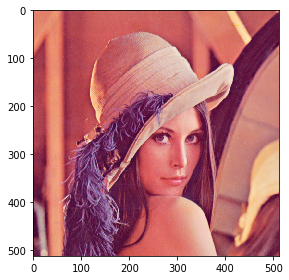

In [2]:
image = io.imread('Lena.tiff')
io.imshow(image)

56544


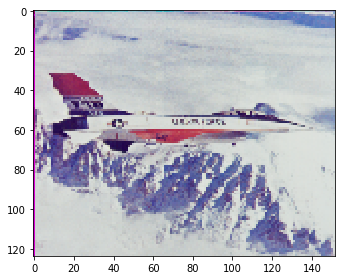

In [3]:
rows, cols, dims = image.shape
encrypted_image = io.imread('F16.tiff')
encrypted_image = encrypted_image[:,:,:3]
print(encrypted_image[:,:,:3].size)
io.imshow(encrypted_image[:,:,:3])

In [4]:
encrypted_rows, encrypted_cols, encrypted_dim = encrypted_image.shape
encrypted_channel = []
encrypted_channel.append(encrypted_image[:,:,0].flatten())
encrypted_channel.append(encrypted_image[:,:,1].flatten())
encrypted_channel.append(encrypted_image[:,:,2].flatten())
encrypted_rows, encrypted_cols, encrypted_dim , encrypted_rows*encrypted_cols*encrypted_dim*8

(124, 152, 3, 452352)

In [5]:
total_bits = rows*cols*dims
one_channel_bits = rows*cols
one_channel_bits, total_bits

(262144, 786432)

In [6]:
def to_bits(arr):
    result = []
    for i in arr:
        bits = "{0:b}".format(int(i))
        bits= '00000000'[len(bits):]+bits
        result.extend(int(b) for b in bits)
    return result

In [7]:
message_bits = []
for i in range(3):
    message_bits.append(to_bits(encrypted_channel[i]))
len(message_bits[0])

150784

In [8]:
new_image = np.copy(image)
i = 0
j = 0
for ch in range(3):
    m_b = message_bits[ch]
    i = 0
    j = 0
    for bit in m_b:
        new_image[i, j, ch] = (new_image[i, j, ch] & ~1) | bit
        i += 1
        if i == cols:
            i = 0
            j += 1
        if j == rows:
            break
io.imsave('Image_encoded_lena.tiff', new_image)